In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("Datasets for NPV/Team 3/earthquake.csv")

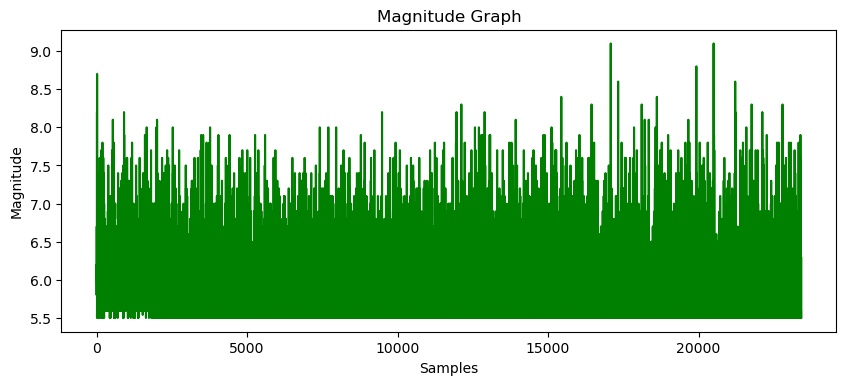

In [56]:
#Uni-variet plot showing the magnitude of the earthquake across dataset
plt.figure(figsize=(10,4), dpi=100)
df.Magnitude.plot(kind='line', color='g')
plt.xlabel('Samples')
plt.ylabel('Magnitude')
plt.title('Magnitude Graph')
plt.savefig('Magnitude Graph.png')

Before: Elements with nan in Mangnitude Type

            Date      Time  Latitude  Longitude        Type  Depth  \
6703  08/24/1983  13:36:00   40.3732  -124.9227  Earthquake  11.93   
7294  11/23/1984  18:08:00   37.4600  -118.5900  Earthquake   9.00   
7919  03/31/1986  11:55:00   37.4788  -121.6858  Earthquake   9.17   

      Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
6703          NaN                     NaN       5.70            NaN  ...   
7294          NaN                     NaN       5.82            NaN  ...   
7919          NaN                     NaN       5.60            NaN  ...   

      Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
6703                         NaN            NaN                  NaN   
7294                         NaN            NaN                  NaN   
7919                         NaN            NaN                  NaN   

      Horizontal Error  Root Mean Square                   ID Source  \
6703   

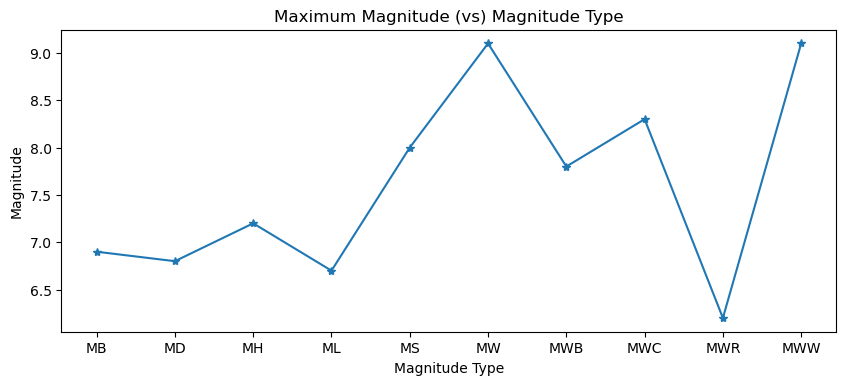

In [57]:
#Bi-variet graph depicting Maximum of Magniude earthquake grouped by the MagnitudeType
#Get access to figure object for customisation
plt.figure(figsize=(10,4), dpi=100)

df1 = df.copy()

#Check if any row is having 'nan' fill the data with any of the forward fill
if df1['Magnitude Type'].isnull().values.any():
    nan_index = df1.loc[df1['Magnitude Type'].isnull()].index
    print('Before: Elements with nan in Mangnitude Type\n')
    print(df1.loc[df1['Magnitude Type'].isnull()])
    print("indicies are \n",nan_index)
    df1['Magnitude Type'].fillna(method='ffill', inplace=True)
    print("\n After \n",df1.iloc[nan_index])

magnitude_series = df.groupby(by='Magnitude Type')['Magnitude'].max()
plt.plot(magnitude_series, marker = '*')
plt.xlabel('Magnitude Type')
plt.ylabel('Magnitude')
plt.title('Maximum Magnitude (vs) Magnitude Type')
# Turn on the grid
ax.grid()
plt.savefig('Maximum_Magnitude_vs_Magnitude_Type.png')

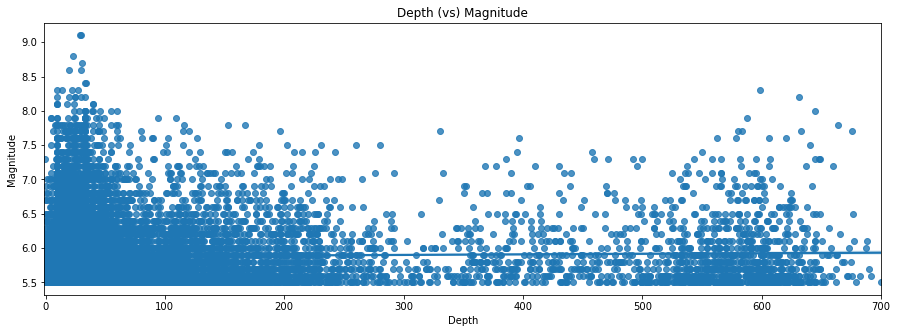

In [58]:
fig_dims = (15, 5)
fig, axs = plt.subplots(figsize=fig_dims)
axs.set_title('Depth (vs) Magnitude')
sns.regplot(data=df1, x='Depth', y='Magnitude', ax=axs)
plt.savefig('Depth_vs_Magnitude.png')

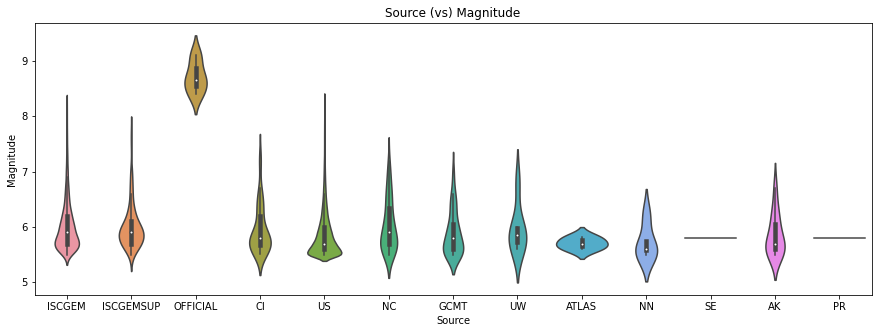

In [59]:
fig_dims = (15, 5)
fig, axs = plt.subplots(figsize=fig_dims)
axs.set_title('Source (vs) Magnitude')
sns.violinplot(data=df1, x='Source', y='Magnitude', ax=axs)
plt.savefig('Source_vs_Magnitude.png')

Figure(2400x2000)


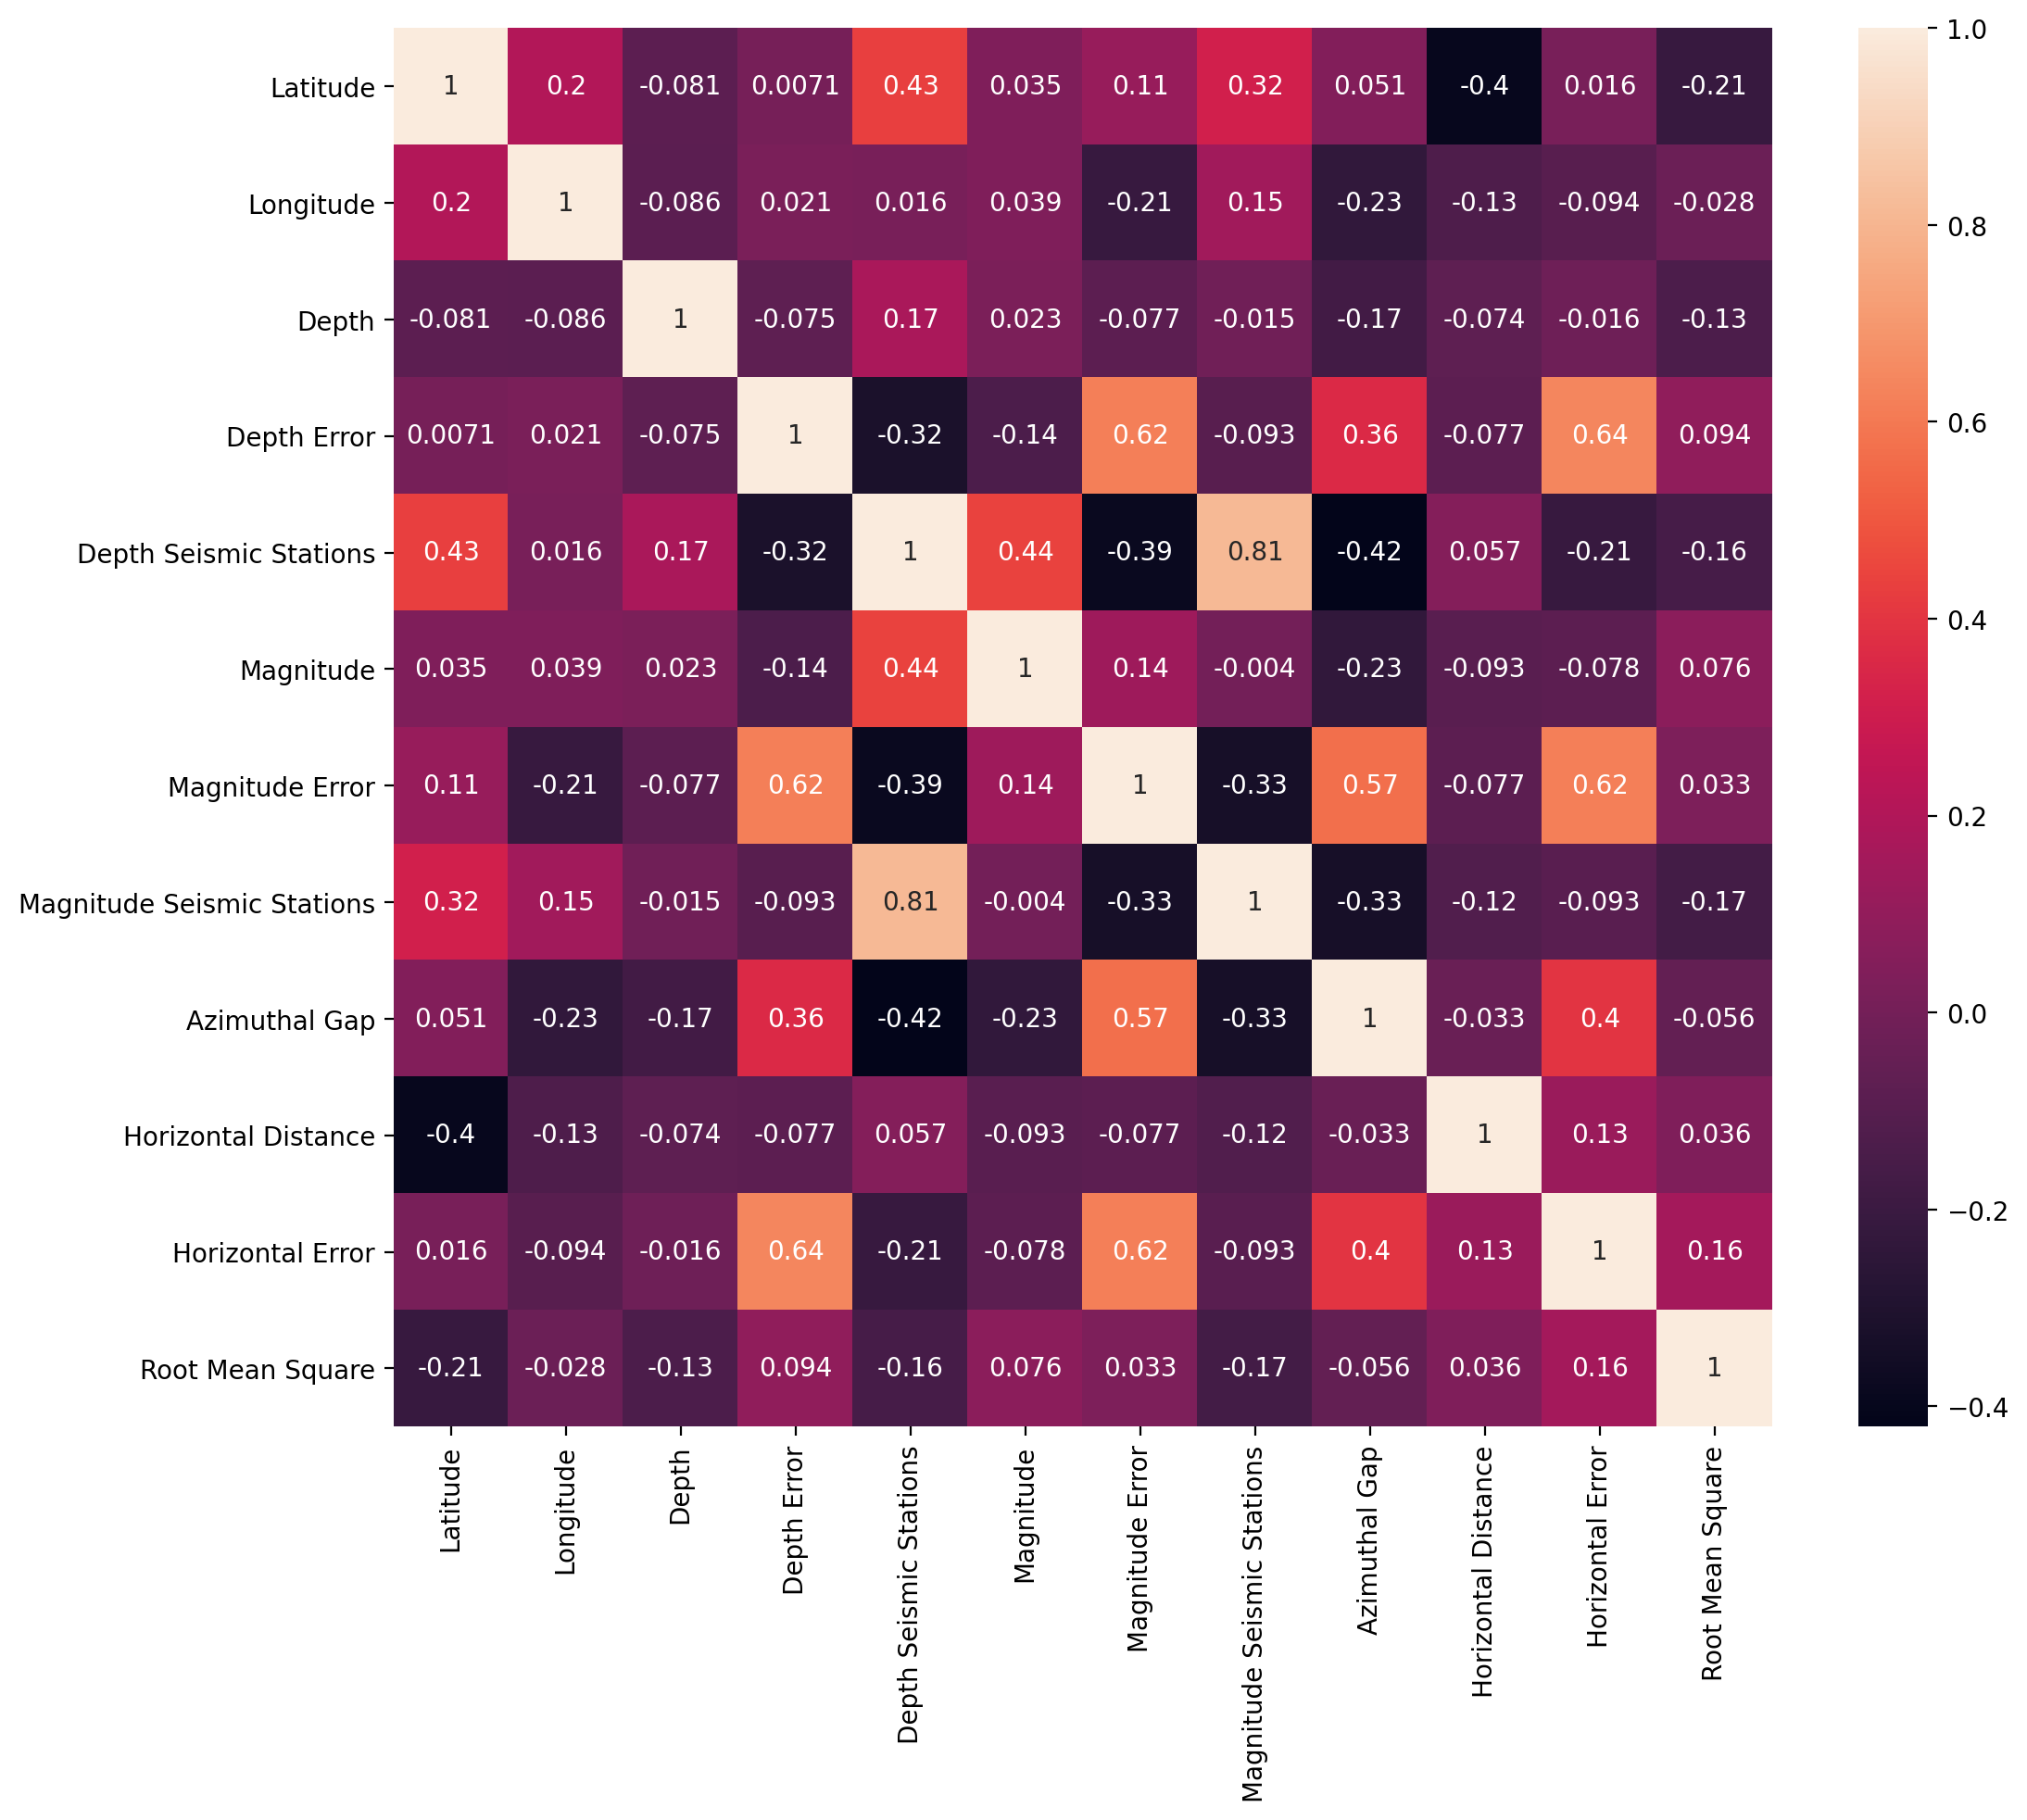

In [60]:
cmat = df1.corr()
plt.figure(figsize=(12,10), dpi=200)
sns.heatmap(cmat, annot=True)
f = plt.gcf()
print(f)

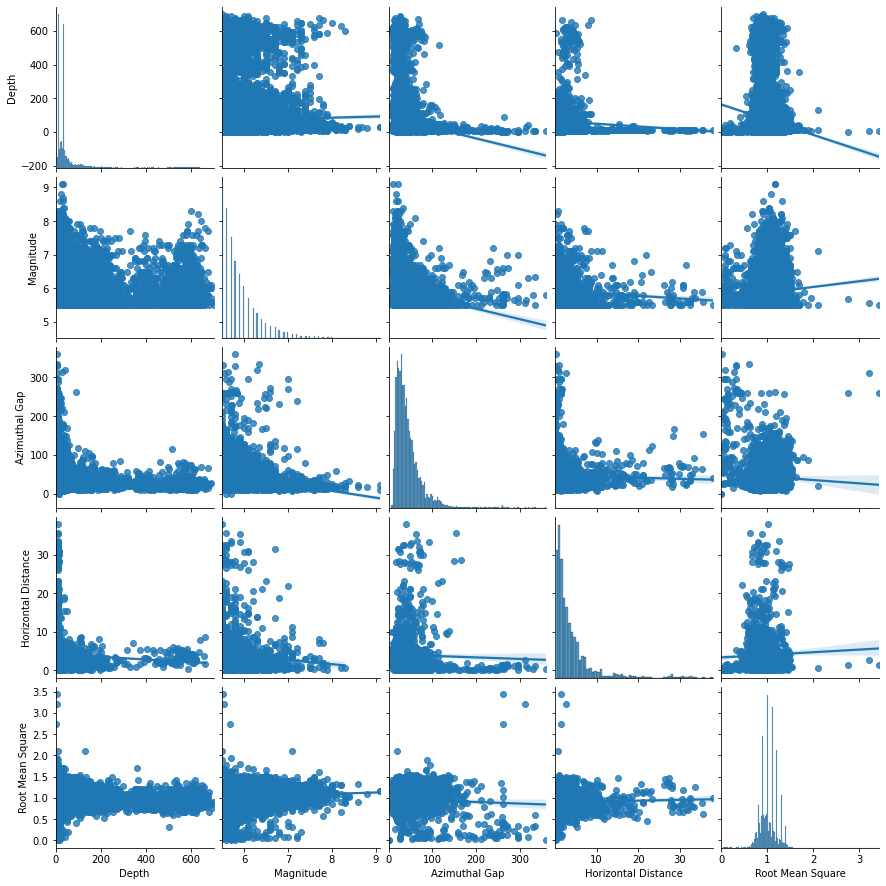

In [61]:
sns.pairplot(df1[['Depth','Magnitude','Azimuthal Gap','Horizontal Distance','Root Mean Square']], kind='reg')